In [1]:
#any necessary imports
import pandas as pd
import numpy as np
import json
import requests
from tqdm import tqdm
import os
import io
import errno
import re
import random
import numpy as np
import sys
import copy
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import datetime

pd.set_option('display.max_columns', None)

In [2]:
ddm_df = pd.read_csv("C:/Users/OWNER/CR4CR/data/Spr24_HS_PSM.csv")
ddm_df.head()

,Assignment,Activities,Date,Time,Action
0,106470,Spr 2024 PSM Form E,04/26/2024,08:39:30.483,Begin activity Spring 2024 HS PSM Administration
1,106470,Spr 2024 PSM Form E,04/26/2024,08:39:33.160,Page 1 Loaded
2,106470,Spr 2024 PSM Form E,04/26/2024,08:39:46.299,Page next clicked on page 1
3,106470,Spr 2024 PSM Form E,04/26/2024,08:39:48.251,Page 2 Loaded
4,106470,Spr 2024 PSM Form E,04/26/2024,08:40:03.118,Page next clicked on page 2


In [3]:
print('Number of students in full dataset:', len(ddm_df['Assignment'].unique()))
print('Number of activities in full dataset:', len(ddm_df['Activities'].unique()))

print(ddm_df['Activities'].unique())
print(ddm_df['Action'].unique())

ddm_df['Action'].unique()
['Begin activity Spring 2024 HS PSM Administration', 'End activity Spring 2024 HS PSM Administration','Pause activity Spring 2024 HS PSM Administration', 'Continue activity Spring 2024 HS PSM Administration']

Number of students in full dataset: 2960
Number of activities in full dataset: 4
['Spr 2024 PSM Form E' 'Spr 2024 PSM Form D' 'Spr 2024 PSM Form C'
 'Spr 2024 PSM Form B']
['Begin activity Spring 2024 HS PSM Administration' 'Page 1 Loaded'
 'Page next clicked on page 1' 'Page 2 Loaded'
 'Page next clicked on page 2' 'Page 3 Loaded'
 'Page next clicked on page 3' 'Page 4 Loaded'
 'Page next clicked on page 4' 'Page 5 Loaded'
 'Page next clicked on page 5' 'Missing answers' 'Page 6 Loaded'
 'Page next clicked on page 6' 'Page 7 Loaded'
 'Page next clicked on page 7' 'Page 8 Loaded'
 'Page next clicked on page 8' 'Page 9 Loaded'
 'Page next clicked on page 9' 'Page 10 Loaded'
 'Page next clicked on page 10' 'Page 11 Loaded'
 'Page next clicked on page 11' 'Page 12 Loaded'
 'Page next clicked on page 12' 'Page 13 Loaded'
 'Page next clicked on page 13' 'Page 14 Loaded'
 'Page next clicked on page 14' 'Page 15 Loaded'
 'Page next clicked on page 15' 'Page 16 Loaded'
 'Page next clicked on p

['Begin activity Spring 2024 HS PSM Administration',
 'End activity Spring 2024 HS PSM Administration',
 'Pause activity Spring 2024 HS PSM Administration',
 'Continue activity Spring 2024 HS PSM Administration']

# Pause Subset

In [4]:
# Pause

def check_end_activity(group):
    return 'End activity Spring 2024 HS PSM Administration' in group['Action'].values

# Group by 'Assignment', apply the function, and count False values which indicate missing 'End activity'
missing_end_activity_count = ddm_df.groupby('Assignment').apply(check_end_activity).value_counts()[False]

print(f"Num students missing 'End activity Spring 2024 HS PSM Administration': {missing_end_activity_count}")

#Number of students who paused
pause_activities = ddm_df[ddm_df['Action'] == 'Pause activity Spring 2024 HS PSM Administration']
unique_assignment = pause_activities["Assignment"].unique()
print(len(unique_assignment))

end_activities = ddm_df[ddm_df['Action'] == 'End activity Spring 2024 HS PSM Administration']
unique_date = end_activities["Date"].unique()
print(len(unique_date))

Num students missing 'End activity Spring 2024 HS PSM Administration': 304
280
45


In [5]:
ddm_df['Datetime'] = pd.to_datetime(ddm_df['Date'] + ' ' + ddm_df['Time'])

In [6]:
# Filter start and end times into separate DataFrames
start_times = ddm_df[ddm_df['Action'] == 'Begin activity Spring 2024 HS PSM Administration']
end_times = ddm_df[ddm_df['Action'] == 'End activity Spring 2024 HS PSM Administration']

start_times = start_times.set_index('Assignment')
end_times = end_times.set_index('Assignment')

durations = end_times['Datetime'] - start_times['Datetime']
durations = durations[durations > pd.Timedelta(0)]
average_completion_time = durations.mean()
print(f"Average Completion Time: {average_completion_time}")

completed = ddm_df[ddm_df["Action"].isin(['End activity Spring 2024 HS PSM Administration'])]
completed.head(5)

Average Completion Time: 0 days 14:04:56.294578729


,Assignment,Activities,Date,Time,Action,Datetime
59,106470,Spr 2024 PSM Form E,04/26/2024,09:12:27.787,End activity Spring 2024 HS PSM Administration,2024-04-26 09:12:27.787
123,105515,Spr 2024 PSM Form D,05/14/2024,09:32:35.508,End activity Spring 2024 HS PSM Administration,2024-05-14 09:32:35.508
185,105698,Spr 2024 PSM Form C,05/14/2024,09:32:55.660,End activity Spring 2024 HS PSM Administration,2024-05-14 09:32:55.660
249,106406,Spr 2024 PSM Form D,04/26/2024,08:47:01.597,End activity Spring 2024 HS PSM Administration,2024-04-26 08:47:01.597
313,113344,Spr 2024 PSM Form C,05/09/2024,20:49:35.090,End activity Spring 2024 HS PSM Administration,2024-05-09 20:49:35.090


In [8]:
#get the unique id's for the subet of students who finished the activities
completed_assignments = completed['Assignment'].unique()
print(len(completed_assignments))

completed_subset = ddm_df[ddm_df['Assignment'].isin(completed_assignments)]
completed_subset.head(5)

2656


,Assignment,Activities,Date,Time,Action,Datetime
0,106470,Spr 2024 PSM Form E,04/26/2024,08:39:30.483,Begin activity Spring 2024 HS PSM Administration,2024-04-26 08:39:30.483
1,106470,Spr 2024 PSM Form E,04/26/2024,08:39:33.160,Page 1 Loaded,2024-04-26 08:39:33.160
2,106470,Spr 2024 PSM Form E,04/26/2024,08:39:46.299,Page next clicked on page 1,2024-04-26 08:39:46.299
3,106470,Spr 2024 PSM Form E,04/26/2024,08:39:48.251,Page 2 Loaded,2024-04-26 08:39:48.251
4,106470,Spr 2024 PSM Form E,04/26/2024,08:40:03.118,Page next clicked on page 2,2024-04-26 08:40:03.118


# Completion Time for all completers (incl. those who paused)

In [9]:
# Convert the 'Datetime' column to datetime format
completed_subset.loc[:, 'Datetime'] = pd.to_datetime(completed_subset['Datetime'])

# Filter to get rows where the action is 'Begin activity Spring 2024 HS PSM Administration'
begin_activities = completed_subset[completed_subset['Action'] == 'Begin activity Spring 2024 HS PSM Administration']

# Filter to get rows where the action is 'End activity Spring 2024 HS PSM Administration'
end_activities = completed_subset[completed_subset['Action'] == 'End activity Spring 2024 HS PSM Administration']

# Merge begin and end activities on 'Assignment'
activity_times = pd.merge(begin_activities, end_activities, on='Assignment', suffixes=('_begin', '_end'))

# Calculate the difference in minutes
activity_times['Duration_Minutes'] = (activity_times['Datetime_end'] - activity_times['Datetime_begin']).dt.total_seconds() / 60

# Create a result DataFrame with relevant information
result = activity_times[['Assignment', 'Datetime_begin', 'Datetime_end', 'Duration_Minutes']]

result

,Assignment,Datetime_begin,Datetime_end,Duration_Minutes
0,106470,2024-04-26 08:39:30.483,2024-04-26 09:12:27.787,32.955067
1,105515,2024-05-14 09:13:01.657,2024-05-14 09:32:35.508,19.564183
2,105698,2024-05-14 08:41:29.544,2024-05-14 09:32:55.660,51.435267
3,106406,2024-04-26 08:33:52.933,2024-04-26 08:47:01.597,13.144400
4,113344,2024-05-09 19:48:09.291,2024-05-09 20:49:35.090,61.429983
...,...,...,...,...
2656,105602,2024-05-23 11:18:49.620,2024-05-23 11:52:42.622,33.883367
2657,106417,2024-04-26 08:40:27.237,2024-05-01 08:41:49.470,7201.370550
2658,105893,2024-05-21 08:18:22.917,2024-05-23 08:15:09.410,2876.774883
2659,105902,2024-05-23 07:13:52.338,2024-05-23 08:15:16.649,61.405183


In [10]:
# Display the result
combined_results_df = pd.merge(result, completed_subset[['Assignment', 'Activities']], on='Assignment', how='inner')
combined_result_df = combined_results_df.drop_duplicates()

results_df = combined_result_df.drop_duplicates()
modified_results_df = results_df[["Assignment", "Activities", "Duration_Minutes"]]
modified_results_df.loc[:, 'Duration_Minutes'] = pd.to_timedelta(modified_results_df['Duration_Minutes'], unit='m')

modified_day_limit = modified_results_df[modified_results_df['Duration_Minutes'] <= pd.Timedelta(days=1)]

modified_ave_per_act = modified_day_limit.groupby('Activities')[['Duration_Minutes']].describe()
modified_ave_per_act = modified_ave_per_act.astype(str)
modified_ave_per_act[('Duration_Minutes', 'mean')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', 'mean')]]
modified_ave_per_act[('Duration_Minutes', 'std')] = [x[7:-10] for x in modified_ave_per_act[('Duration_Minutes', 'std')]]
modified_ave_per_act[('Duration_Minutes', 'min')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', 'min')]]
modified_ave_per_act[('Duration_Minutes', '25%')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', '25%')]]
modified_ave_per_act[('Duration_Minutes', '50%')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', '50%')]]
modified_ave_per_act[('Duration_Minutes', '75%')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', '75%')]]
modified_ave_per_act[('Duration_Minutes', 'max')] = [x[7:-7] for x in modified_ave_per_act[('Duration_Minutes', 'max')]]

modified_ave_per_act

Duration_Minutes                                      \
                               count         mean       std          min   
Activities                                                                 
Spr 2024 PSM Form B              604  01:15:17.93  03:20:11     00:04:00   
Spr 2024 PSM Form C              596  01:06:53.68  02:58:42     00:04:26   
Spr 2024 PSM Form D              580  01:28:33.62  03:53:08  00:05:04.57   
Spr 2024 PSM Form E              588  01:11:10.17  03:02:10  00:04:35.27   

                                                                         
                             25%          50%          75%          max  
Activities                                                               
Spr 2024 PSM Form B     00:18:17     00:29:09     00:42:34     23:36:04  
Spr 2024 PSM Form C  00:16:04.11  00:29:15.04  00:43:33.68     23:59:55  
Spr 2024 PSM Form D  00:18:29.36     00:30:51  00:45:46.64  23:56:27.01  
Spr 2024 PSM Form E  00:18:16.73     00:29:04  00:40:21.74  22:56:41.28

In [11]:
just_act_and_ct = modified_day_limit[['Assignment','Activities', 'Duration_Minutes']].reset_index(drop=True)
just_act_and_ct['Completion_Time'] = [td.total_seconds() / 3600 if isinstance(td, pd.Timedelta) else td for td in just_act_and_ct['Duration_Minutes']]
just_act_and_ct['Activities'] = just_act_and_ct['Activities'].astype(str)
just_act_and_ct['Activities'] = [x[11:] for x in just_act_and_ct['Activities']]

just_act_and_ct

,Assignment,Activities,Duration_Minutes,Completion_Time
0,106470,M Form E,0 days 00:32:57.304000002,0.549251
1,105515,M Form D,0 days 00:19:33.850999998,0.326070
2,105698,M Form C,0 days 00:51:26.116000002,0.857254
3,106406,M Form D,0 days 00:13:08.664000,0.219073
4,113344,M Form C,0 days 01:01:25.798999998,1.023833
...,...,...,...,...
2363,107577,M Form B,0 days 00:25:36.571000002,0.426825
2364,105437,M Form B,0 days 00:16:19.189000002,0.271997
2365,105602,M Form C,0 days 00:33:53.002000002,0.564723
2366,105902,M Form D,0 days 01:01:24.310999998,1.023420


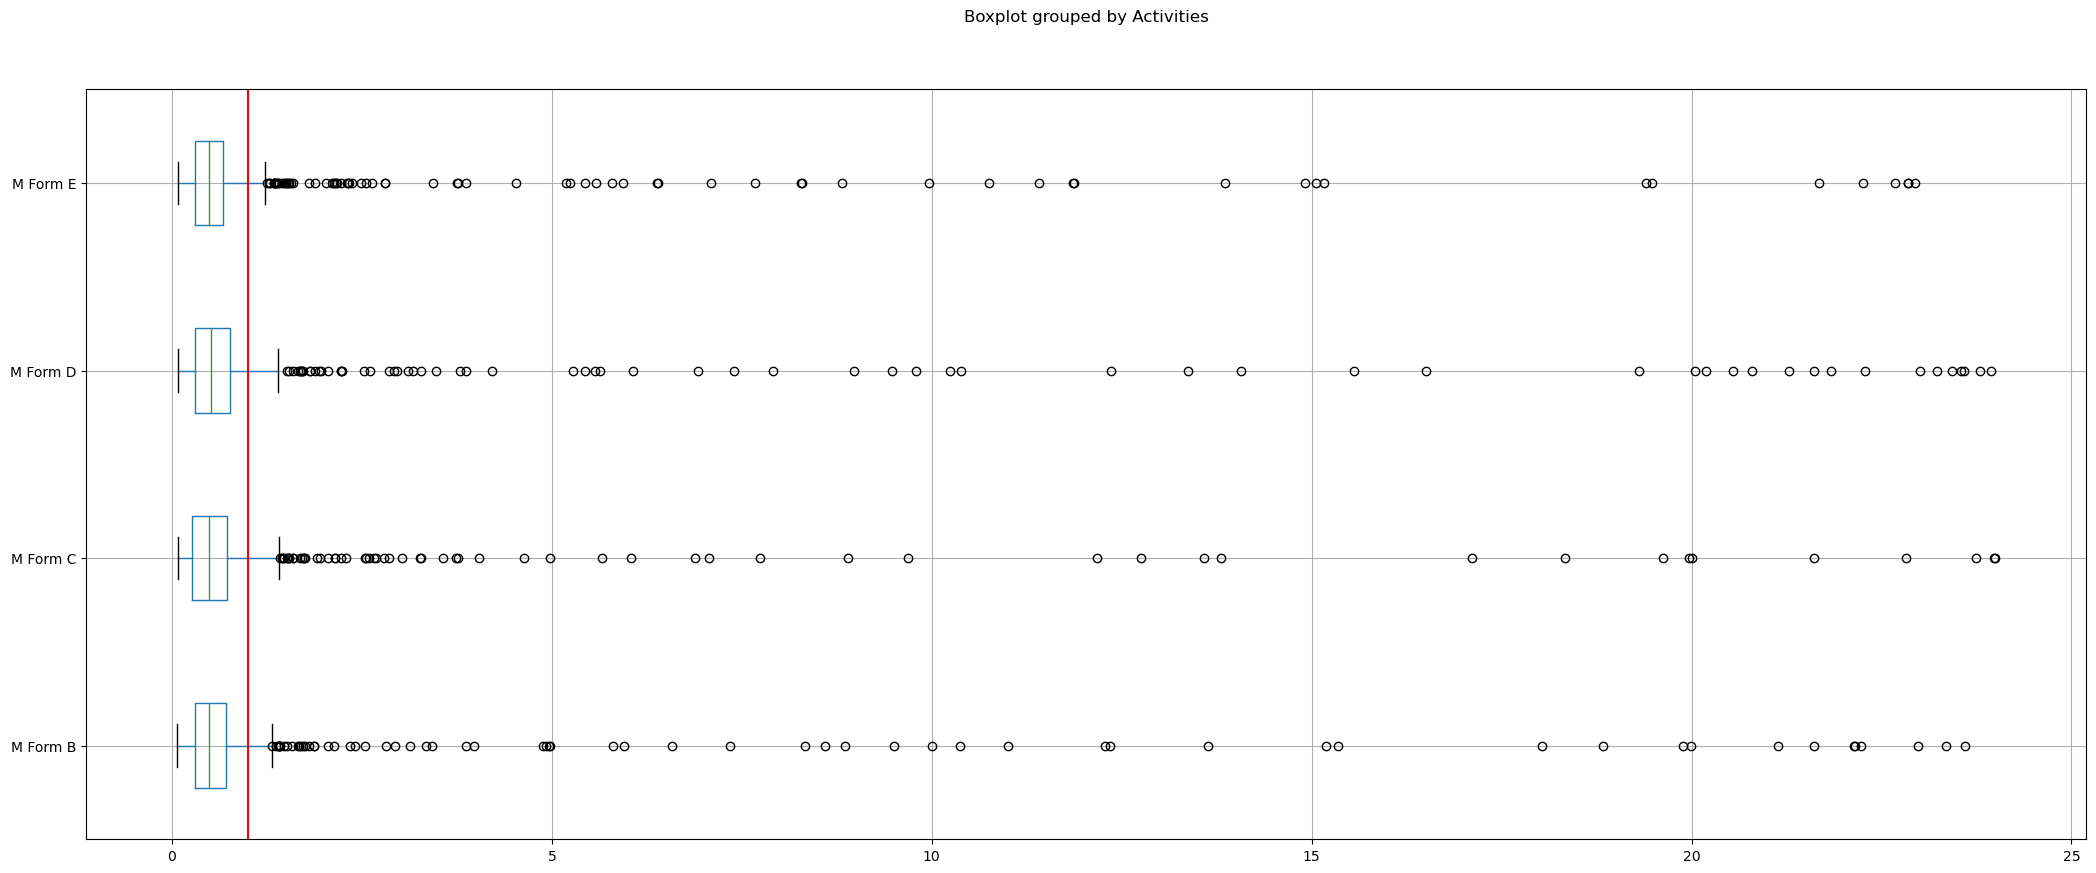

In [12]:
just_act_and_ct.boxplot(column = 'Completion_Time', by = 'Activities', figsize=(25,10), vert=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.axvline(1, color = 'r')
plt.rcParams.update({'font.size': 15})
plt.show()

In [14]:
paused_subset = completed_subset[completed_subset['Action'].isin(['Begin activity Spring 2024 HS PSM Administration',
                                                                  'Pause activity Spring 2024 HS PSM Administration',
                                                                  'Continue activity Spring 2024 HS PSM Administration',
                                                                  'End activity Spring 2024 HS PSM Administration'])].reset_index(drop = True)
paused_subset.head(10)
len(paused_subset)

6254

# Calculation Completion Time: Number of Students Who Paused

In [15]:
# of students who paused but still completed activity
paused_students = completed_subset[completed_subset["Action"] == "Pause activity Spring 2024 HS PSM Administration"]
print(len(paused_students))

unique_pause = paused_students["Assignment"].unique()
print(len(unique_pause))

304
223


# Completion Time for students who did NOT pause

In [16]:
# Completion Time for students who did NOT pause

no_pause_ddm_df = ddm_df[~ddm_df["Assignment"].isin(unique_pause)].sort_values("Datetime", ascending = True)
no_pause_ddm_df['Datetime'] = pd.to_datetime(no_pause_ddm_df['Datetime'])

# Filter to get rows where the action is 'Begin activity Spring 2024 HS DDM Administration'
begin_activities = no_pause_ddm_df[no_pause_ddm_df['Action'] == 'Begin activity Spring 2024 HS PSM Administration']

# Filter to get rows where the action is 'End activity Spring 2024 HS DDM Administration'
end_activities = no_pause_ddm_df[no_pause_ddm_df['Action'] == 'End activity Spring 2024 HS PSM Administration']

# Merge begin and end activities on 'Assignment'
activity_times = pd.merge(begin_activities, end_activities, on='Assignment', suffixes=('_begin', '_end'))

# Calculate the difference in minutes
activity_times['Duration_Minutes'] = (activity_times['Datetime_end'] - activity_times['Datetime_begin']).dt.total_seconds() / 60

# Create a result DataFrame with relevant information
no_result = activity_times[['Assignment','Datetime_begin', 'Datetime_end', 'Duration_Minutes']]
no_result

,Assignment,Datetime_begin,Datetime_end,Duration_Minutes
0,105195,2024-04-10 09:11:39.016,2024-04-10 09:22:11.440,10.540400
1,109619,2024-04-10 09:12:19.870,2024-04-10 09:48:57.168,36.621633
2,105199,2024-04-10 09:12:56.793,2024-04-10 09:31:55.304,18.975183
3,109620,2024-04-10 09:12:58.957,2024-04-10 09:46:31.436,33.541317
4,105197,2024-04-10 09:13:27.966,2024-04-10 09:50:10.669,36.711717
...,...,...,...,...
2433,108371,2024-05-24 08:58:14.267,2024-05-24 09:33:37.274,35.383450
2434,114539,2024-05-24 08:58:35.097,2024-05-24 10:20:57.859,82.379367
2435,105587,2024-05-24 09:27:30.842,2024-05-24 09:45:20.417,17.826250
2436,106242,2024-05-24 11:48:54.390,2024-05-24 12:21:28.323,32.565550


In [17]:
# Merge the dataframes on 'Assignment'
combined_results_df = pd.merge(no_result, no_pause_ddm_df[['Assignment', 'Activities']], on='Assignment', how='inner')

# Drop duplicates
no_combined_result_df = combined_results_df.drop_duplicates()

# Display the result
results_df = no_combined_result_df.drop_duplicates()

# Select relevant columns
modified_results_df = results_df[["Assignment", "Activities", "Duration_Minutes"]]

# Convert 'Duration_Minutes' to timedelta
modified_results_df.loc[:, 'Duration_Minutes'] = pd.to_timedelta(modified_results_df['Duration_Minutes'], unit='m')

# Filter the results to include only those with duration less than or equal to 1 day
modified_day_limit = modified_results_df[modified_results_df['Duration_Minutes'] <= pd.Timedelta(days=1)]
modified_day_limit

,Assignment,Activities,Duration_Minutes
0,105195,Spr 2024 PSM Form D,0 days 00:10:32.424000
56,109619,Spr 2024 PSM Form D,0 days 00:36:37.297999998
114,105199,Spr 2024 PSM Form D,0 days 00:18:58.510999998
170,109620,Spr 2024 PSM Form C,0 days 00:33:32.479000002
226,105197,Spr 2024 PSM Form B,0 days 00:36:42.703000002
...,...,...,...
149440,108371,Spr 2024 PSM Form C,0 days 00:35:23.007000
149504,114539,Spr 2024 PSM Form E,0 days 01:22:22.762000002
149575,105587,Spr 2024 PSM Form E,0 days 00:17:49.575000
149637,106242,Spr 2024 PSM Form E,0 days 00:32:33.933000


In [18]:
def format_duration(td):
    total_minutes = td.total_seconds() / 60
    hours = int(total_minutes // 60)
    minutes = int(total_minutes % 60)
    return f"{hours}h {minutes}m"

# Assuming 'modified_day_limit' is your DataFrame
# Apply the formatting function to the 'Duration_Minutes' column using .loc
modified_day_limit.loc[:, 'Formatted_Duration'] = modified_day_limit['Duration_Minutes'].apply(format_duration)

# Display the result
modified_day_limit[['Assignment', 'Activities', 'Formatted_Duration']]

C:\Users\OWNER\AppData\Local\Temp\ipykernel_25636\3602217685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_day_limit.loc[:, 'Formatted_Duration'] = modified_day_limit['Duration_Minutes'].apply(format_duration)


,Assignment,Activities,Formatted_Duration
0,105195,Spr 2024 PSM Form D,0h 10m
56,109619,Spr 2024 PSM Form D,0h 36m
114,105199,Spr 2024 PSM Form D,0h 18m
170,109620,Spr 2024 PSM Form C,0h 33m
226,105197,Spr 2024 PSM Form B,0h 36m
...,...,...,...
149440,108371,Spr 2024 PSM Form C,0h 35m
149504,114539,Spr 2024 PSM Form E,1h 22m
149575,105587,Spr 2024 PSM Form E,0h 17m
149637,106242,Spr 2024 PSM Form E,0h 32m


# Completion Time DF FOR NO PAUSE STUDENTS

In [19]:
sorted_modified_day_limit = modified_day_limit.sort_values('Formatted_Duration', ascending = False)
sorted_modified_day_limit

pause_ddm_df = ddm_df[ddm_df["Assignment"].isin(unique_pause)].sort_values("Datetime", ascending = True)
pause_ddm_df

pause_actions = pause_ddm_df[pause_ddm_df['Action'] == "Pause activity Spring 2024 HS PSM Administration"]

# Step 2: Group by 'Assignment' and count the occurrences
pause_counts = pause_actions.groupby('Assignment').size()

assignments_with_multiple_pauses = pause_counts[pause_counts >= 2].index.tolist()
print(len(assignments_with_multiple_pauses))

one_pause_ddm_df = pause_ddm_df[~pause_ddm_df['Assignment'].isin(assignments_with_multiple_pauses)]
print(len(one_pause_ddm_df))

53
10790


# REFINED WAY TO CALCULATE DIFFERENCE BETWEEN PAUSE AND CONTINUE

In [20]:
import pandas as pd
from datetime import timedelta

# Assuming 'one_pause_ddm_df' is already defined and sorted by 'Assignment' and 'Datetime'

# Step 1: Sort the DataFrame by 'Assignment' and 'Datetime'
one_pause_ddm_df = one_pause_ddm_df.sort_values(by=['Assignment', 'Datetime'])

# Step 2: Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Assignment', 'Pause_Datetime', 'Continue_Datetime', 'Time_Difference'])

# Step 3: Iterate through each assignment group
for assignment, group in one_pause_ddm_df.groupby('Assignment'):
    # Iterate through each row in the group
    iter_group = iter(group.iterrows())
    for idx, row in iter_group:
        if row['Action'].startswith('Pause'):
            # Capture pause datetime
            pause_datetime = row['Datetime']

            # Look for the next continue activity
            try:
                next_idx, next_row = next(iter_group)
                if next_row['Action'].startswith('Continue'):
                    continue_datetime = next_row['Datetime']

                    # Calculate time difference
                    time_difference = continue_datetime - pause_datetime

                    # Append to results DataFrame
                    results = pd.concat([results, pd.DataFrame({
                        'Assignment': [assignment],
                        'Pause_Datetime': [pause_datetime],
                        'Continue_Datetime': [continue_datetime],
                        'Time_Difference': [time_difference]
                    })], ignore_index=True)
            except StopIteration:
                # No more rows in group
                pass

# Step 4: Display or use the results DataFrame as needed
results

,Assignment,Pause_Datetime,Continue_Datetime,Time_Difference
0,103671,2024-05-15 19:56:10.201,2024-05-15 19:56:14.424,0 days 00:00:04.223000
1,103687,2024-05-06 04:42:25.121,2024-05-06 05:15:36.413,0 days 00:33:11.292000
2,103704,2024-05-16 04:37:48.279,2024-05-16 04:37:55.382,0 days 00:00:07.103000
3,103757,2024-05-16 06:16:27.338,2024-05-20 07:47:40.502,4 days 01:31:13.164000
4,103773,2024-05-21 06:28:47.064,2024-05-21 09:26:18.651,0 days 02:57:31.587000
...,...,...,...,...
153,113931,2024-05-16 05:16:44.018,2024-05-16 07:56:39.631,0 days 02:39:55.613000
154,113992,2024-05-16 08:53:21.254,2024-05-16 10:06:34.350,0 days 01:13:13.096000
155,114178,2024-05-19 10:58:16.904,2024-05-19 11:08:24.321,0 days 00:10:07.417000
156,114440,2024-05-22 06:26:42.514,2024-05-22 06:31:18.767,0 days 00:04:36.253000


In [21]:
results['Pause_Datetime'] = pd.to_datetime(results['Pause_Datetime'])
results['Continue_Datetime'] = pd.to_datetime(results['Continue_Datetime'])

# Calculate time difference in minutes
results['Time_Difference_minutes'] = (results['Continue_Datetime'] - results['Pause_Datetime']).dt.total_seconds() / 60.0

# Display the results
one_pause_new_df = results[['Assignment', 'Pause_Datetime', 'Continue_Datetime', 'Time_Difference_minutes']]
one_pause_new_df

one_pause_ddm_df['Datetime'] = pd.to_datetime(one_pause_ddm_df['Datetime'])

# Filter to get rows where the action is 'Begin activity Spring 2024 HS DDM Administration'
begin_activities = one_pause_ddm_df[one_pause_ddm_df['Action'] == 'Begin activity Spring 2024 HS PSM Administration']

# Filter to get rows where the action is 'End activity Spring 2024 HS DDM Administration'
end_activities = one_pause_ddm_df[one_pause_ddm_df['Action'] == 'End activity Spring 2024 HS PSM Administration']

# Merge begin and end activities on 'Assignment'
activity_times = pd.merge(begin_activities, end_activities, on='Assignment', suffixes=('_begin', '_end'))

# Calculate the difference in minutes
activity_times['Duration_Minutes'] = (activity_times['Datetime_end'] - activity_times['Datetime_begin']).dt.total_seconds() / 60

# Create a result DataFrame with relevant information
result = activity_times[['Assignment','Datetime_begin', 'Datetime_end', 'Duration_Minutes']]
result

#CORRECTED COMPLETION TIME DATAFRAME HERE: ONE PAUSE
one_merged_df = pd.merge(one_pause_new_df, result, on="Assignment")
one_merged_df

,Assignment,Pause_Datetime,Continue_Datetime,Time_Difference_minutes,Datetime_begin,Datetime_end,Duration_Minutes
0,103671,2024-05-15 19:56:10.201,2024-05-15 19:56:14.424,0.070383,2024-05-15 19:54:25.970,2024-05-15 20:34:55.413,40.490717
1,103687,2024-05-06 04:42:25.121,2024-05-06 05:15:36.413,33.188200,2024-05-06 04:38:15.606,2024-05-06 05:23:46.624,45.516967
2,103704,2024-05-16 04:37:48.279,2024-05-16 04:37:55.382,0.118383,2024-05-16 04:24:40.140,2024-05-16 05:03:27.044,38.781733
3,103757,2024-05-16 06:16:27.338,2024-05-20 07:47:40.502,5851.219400,2024-05-16 06:16:16.055,2024-05-20 08:09:00.281,5872.737100
4,103773,2024-05-21 06:28:47.064,2024-05-21 09:26:18.651,177.526450,2024-05-21 06:15:21.389,2024-05-21 09:31:26.580,196.086517
...,...,...,...,...,...,...,...
153,113931,2024-05-16 05:16:44.018,2024-05-16 07:56:39.631,159.926883,2024-05-16 04:51:47.580,2024-05-16 08:20:11.387,208.396783
154,113992,2024-05-16 08:53:21.254,2024-05-16 10:06:34.350,73.218267,2024-05-16 08:04:18.487,2024-05-16 10:12:47.840,128.489217
155,114178,2024-05-19 10:58:16.904,2024-05-19 11:08:24.321,10.123617,2024-05-19 10:07:14.833,2024-05-19 11:29:20.657,82.097067
156,114440,2024-05-22 06:26:42.514,2024-05-22 06:31:18.767,4.604217,2024-05-22 06:26:14.419,2024-05-22 06:43:55.509,17.684833


In [22]:
# Calculate the Corrected Completion Time
one_merged_df["Corrected_Completion_Time"] = one_merged_df["Duration_Minutes"] - one_merged_df["Time_Difference_minutes"]

# Sort the DataFrame by Corrected Completion Time
sorted_one_merged_df = one_merged_df.sort_values("Corrected_Completion_Time", ascending=False)

# Filter the DataFrame
one_filtered_df = sorted_one_merged_df[sorted_one_merged_df['Corrected_Completion_Time'] < 1000]

# Merge with the activities data
combined_result_df = pd.merge(one_filtered_df, one_pause_ddm_df[['Assignment', 'Activities']], on='Assignment', how='inner')

# Drop duplicates
combined_result_df = combined_result_df.drop_duplicates()

# Select relevant columns
modified_combined_result_df = combined_result_df[["Assignment", "Activities", "Corrected_Completion_Time"]]

# Convert 'Corrected_Completion_Time' to timedelta
modified_combined_result_df = modified_combined_result_df.assign(
    Corrected_Completion_Time=pd.to_timedelta(modified_combined_result_df['Corrected_Completion_Time'], unit='m')
)

# Function to format duration
def format_duration(td):
    total_minutes = td.total_seconds() / 60
    hours = int(total_minutes // 60)
    minutes = int(total_minutes % 60)
    return f"{hours}h {minutes}m"

# Apply the formatting function to the 'Corrected_Completion_Time' column
modified_combined_result_df = modified_combined_result_df.assign(
    Formatted_Completion_Time=modified_combined_result_df['Corrected_Completion_Time'].apply(format_duration)
)

# Display the DataFrame with the formatted completion time
modified_combined_result_df[['Assignment', 'Activities', 'Formatted_Completion_Time']]

,Assignment,Activities,Formatted_Completion_Time
0,106108,Spr 2024 PSM Form E,11h 26m
75,105128,Spr 2024 PSM Form D,10h 22m
138,110723,Spr 2024 PSM Form C,9h 41m
209,106125,Spr 2024 PSM Form D,8h 16m
275,104631,Spr 2024 PSM Form C,7h 4m
...,...,...,...
8525,105668,Spr 2024 PSM Form C,0h 9m
8590,106489,Spr 2024 PSM Form D,0h 8m
8655,106310,Spr 2024 PSM Form D,0h 6m
8716,106259,Spr 2024 PSM Form E,0h 6m


In [23]:
#SUMMARY TABLE FOR ONE PAUSE DF

modified_ave_per_act = modified_combined_result_df.groupby('Activities')[['Corrected_Completion_Time']].describe()
modified_ave_per_act = modified_ave_per_act.astype(str)
modified_ave_per_act[('Corrected_Completion_Time','mean')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','mean')]]
modified_ave_per_act[('Corrected_Completion_Time','std')] = [x[7:-10] for x in modified_ave_per_act[('Corrected_Completion_Time','std')]]
modified_ave_per_act[('Corrected_Completion_Time','min')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','min')]]
modified_ave_per_act[('Corrected_Completion_Time','25%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','25%')]]
modified_ave_per_act[('Corrected_Completion_Time','50%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','50%')]]
modified_ave_per_act[('Corrected_Completion_Time','75%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','75%')]]
modified_ave_per_act[('Corrected_Completion_Time','max')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','max')]]

modified_ave_per_act

Corrected_Completion_Time                         \
                                        count         mean       std   
Activities                                                             
Spr 2024 PSM Form B                        22  00:56:51.94  00:38:16   
Spr 2024 PSM Form C                        49  01:14:02.28  01:39:28   
Spr 2024 PSM Form D                        35  01:33:23.14  02:12:29   
Spr 2024 PSM Form E                        34  01:15:43.11  02:05:21   

                                                                         \
                             min          25%          50%          75%   
Activities                                                                
Spr 2024 PSM Form B     00:14:47  00:31:10.35  00:42:31.65  01:16:15.40   
Spr 2024 PSM Form C     00:09:58  00:37:49.28     00:48:20     01:00:37   
Spr 2024 PSM Form D  00:05:38.33     00:31:36  00:51:37.64  01:27:42.98   
Spr 2024 PSM Form E     00:06:10  00:28:29.86  00:40:50.08     00:57:59   

                                  
                             max  
Activities                        
Spr 2024 PSM Form B  02:47:16.46  
Spr 2024 PSM Form C  09:41:02.74  
Spr 2024 PSM Form D  10:22:31.69  
Spr 2024 PSM Form E  11:26:58.22

# Two Pauses or More Completion Time Calculation

In [24]:
two_pause_ddm_df = pause_ddm_df[pause_ddm_df['Assignment'].isin(assignments_with_multiple_pauses)]
two_pause_ddm_df

,Assignment,Activities,Date,Time,Action,Datetime
100150,109623,Spr 2024 PSM Form D,04/10/2024,09:18:54.738,Begin activity Spring 2024 HS PSM Administration,2024-04-10 09:18:54.738
100151,109623,Spr 2024 PSM Form D,04/10/2024,09:18:55.378,Page 1 Loaded,2024-04-10 09:18:55.378
100152,109623,Spr 2024 PSM Form D,04/10/2024,09:19:04.460,Page next clicked on page 1,2024-04-10 09:19:04.460
100153,109623,Spr 2024 PSM Form D,04/10/2024,09:19:05.705,Page 2 Loaded,2024-04-10 09:19:05.705
100154,109623,Spr 2024 PSM Form D,04/10/2024,09:19:19.328,Pause activity Spring 2024 HS PSM Administration,2024-04-10 09:19:19.328
...,...,...,...,...,...,...
97271,114514,Spr 2024 PSM Form B,05/24/2024,08:41:58.108,Page 27 Loaded,2024-05-24 08:41:58.108
97272,114514,Spr 2024 PSM Form B,05/24/2024,08:42:50.365,Page next clicked on page 27,2024-05-24 08:42:50.365
97273,114514,Spr 2024 PSM Form B,05/24/2024,08:42:50.956,Missing answers,2024-05-24 08:42:50.956
97274,114514,Spr 2024 PSM Form B,05/24/2024,08:43:34.258,Page next clicked on page 27,2024-05-24 08:43:34.258


In [25]:
import pandas as pd

# Assuming two_pause_ddm_df is your DataFrame containing pause and continue activities

# 'Datetime' 열을 datetime 형식으로 변환
two_pause_ddm_df['Datetime'] = pd.to_datetime(two_pause_ddm_df['Datetime'])

# 'Assignment'와 'Datetime' 기준으로 정렬
two_pause_ddm_df = two_pause_ddm_df.sort_values(by=['Assignment', 'Datetime'])

# 결과를 저장할 리스트 초기화
results = []

# 각 고유한 'Assignment'에 대해 반복
for assignment in two_pause_ddm_df['Assignment'].unique():
    # 현재 'Assignment'에 대한 데이터 필터링
    assignment_df = two_pause_ddm_df[two_pause_ddm_df['Assignment'] == assignment]

    # 'Pause'와 'Continue' 시간을 저장할 변수 초기화
    pause_time = None
    continue_time = None

    # 현재 'Assignment'에 대한 행을 반복
    for index, row in assignment_df.iterrows():
        if 'Pause' in row['Action']:
            pause_time = row['Datetime']
        elif 'Continue' in row['Action']:
            if pause_time is not None:
                continue_time = row['Datetime']
                # 시간 차이 계산
                time_diff = continue_time - pause_time
                # 결과를 딕셔너리로 저장
                results.append({
                    'Assignment': assignment,
                    'Pause_Datetime': pause_time,
                    'Continue_Datetime': continue_time,
                    'Time_Difference_minutes': time_diff.total_seconds() / 60  # 분 단위로 저장
                })
                # 다음 'Pause'를 위해 pause_time 초기화
                pause_time = None

# 결과 리스트를 데이터 프레임으로 변환
two_results_df = pd.DataFrame(results)
two_results_df

C:\Users\OWNER\AppData\Local\Temp\ipykernel_25636\74857435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_pause_ddm_df['Datetime'] = pd.to_datetime(two_pause_ddm_df['Datetime'])


,Assignment,Pause_Datetime,Continue_Datetime,Time_Difference_minutes
0,103769,2024-04-21 08:49:03.125,2024-04-21 09:04:26.107,15.383033
1,103769,2024-04-21 09:05:47.130,2024-04-21 09:08:50.664,3.058900
2,103769,2024-04-21 09:17:58.729,2024-04-21 09:57:03.824,39.084917
3,103789,2024-05-16 09:17:48.692,2024-05-16 09:19:20.198,1.525100
4,103789,2024-05-16 09:50:23.938,2024-05-16 12:05:16.353,134.873583
...,...,...,...,...
105,113463,2024-05-14 08:03:57.783,2024-05-17 12:26:35.285,4582.625033
106,113547,2024-05-14 07:58:39.422,2024-05-15 08:14:09.464,1455.500700
107,113547,2024-05-15 08:14:50.137,2024-05-15 18:10:51.324,596.019783
108,113547,2024-05-15 18:21:01.631,2024-05-15 19:29:56.277,68.910767


In [26]:
grouped_two_df = two_results_df.groupby('Assignment')[['Time_Difference_minutes']].sum()
grouped_two_df

,Time_Difference_minutes
Assignment,
103769,57.526850
103789,5720.778250
103822,24.974450
103863,4.850833
103871,1452.648883
103937,2835.827183
103987,996.535983
104042,0.160733
104051,1392.918100


# FIGURE OUT TWO PAUSE TIME DIFFERENCES

In [27]:
two_pause_ddm_df['Datetime'] = pd.to_datetime(two_pause_ddm_df['Datetime'])

# Filter to get rows where the action is 'Begin activity Spring 2024 HS DDM Administration'
begin_activities = two_pause_ddm_df[two_pause_ddm_df['Action'] == 'Begin activity Spring 2024 HS PSM Administration']

# Filter to get rows where the action is 'End activity Spring 2024 HS DDM Administration'
end_activities = two_pause_ddm_df[two_pause_ddm_df['Action'] == 'End activity Spring 2024 HS PSM Administration']

# Merge begin and end activities on 'Assignment'
activity_times = pd.merge(begin_activities, end_activities, on='Assignment', suffixes=('_begin', '_end'))

# Calculate the difference in minutes
activity_times['Duration_Minutes'] = (activity_times['Datetime_end'] - activity_times['Datetime_begin']).dt.total_seconds() / 60

# Create a result DataFrame with relevant information
result = activity_times[['Assignment', 'Datetime_begin', 'Datetime_end', 'Duration_Minutes']]
result.head(5)

two_merged_df = pd.merge(grouped_two_df, result, on="Assignment")

#CORRECTED COMPLETION TIME DATAFRAME HERE: TWO PAUSE
two_merged_df["Corrected_Completion_Time"] = two_merged_df["Duration_Minutes"] - two_merged_df["Time_Difference_minutes"]
two_merged_df

,Assignment,Time_Difference_minutes,Datetime_begin,Datetime_end,Duration_Minutes,Corrected_Completion_Time
0,103769,57.526850,2024-04-21 08:45:57.828,2024-04-21 10:13:10.969,87.219017,29.692167
1,103789,5720.778250,2024-05-16 09:12:40.573,2024-05-20 09:49:16.012,5796.590650,75.812400
2,103822,24.974450,2024-05-16 10:01:42.398,2024-05-16 11:26:07.337,84.415650,59.441200
3,103863,4.850833,2024-05-21 12:43:12.250,2024-05-21 19:07:11.738,383.991467,379.140633
4,103871,1452.648883,2024-05-21 08:11:33.435,2024-05-22 08:40:10.346,1468.615183,15.966300
5,103937,2835.827183,2024-05-08 11:48:03.885,2024-05-10 12:19:25.735,2911.364167,75.536983
6,103987,996.535983,2024-05-07 13:09:13.172,2024-05-08 21:05:11.218,1915.967433,919.431450
7,104042,0.160733,2024-05-14 09:48:00.898,2024-05-14 10:11:53.134,23.870600,23.709867
8,104051,1392.918100,2024-05-14 08:00:50.313,2024-05-15 08:16:35.172,1455.747650,62.829550
9,104055,2843.427550,2024-05-14 08:54:31.099,2024-05-16 09:13:35.428,2899.072150,55.644600


# MERGING ONE PAUSE AND TWO PAUSE DATAFRAME

In [28]:
one_filtered_df

,Assignment,Pause_Datetime,Continue_Datetime,Time_Difference_minutes,Datetime_begin,Datetime_end,Duration_Minutes,Corrected_Completion_Time
69,106108,2024-04-18 09:20:23.960,2024-04-18 09:45:03.182,24.653700,2024-04-18 07:40:38.630,2024-04-18 19:32:16.081,711.624183,686.970483
28,105128,2024-04-21 18:28:57.594,2024-04-21 18:29:23.691,0.434950,2024-04-21 18:10:44.952,2024-04-22 04:33:42.746,622.963233,622.528283
123,110723,2024-05-01 23:33:03.986,2024-05-01 23:33:12.312,0.138767,2024-05-01 23:09:09.522,2024-05-02 08:50:20.595,581.184550,581.045783
72,106125,2024-05-16 06:52:08.123,2024-05-17 13:02:51.149,1810.717100,2024-05-16 06:47:56.546,2024-05-17 21:15:15.074,2307.308800,496.591700
21,104631,2024-05-08 09:00:07.214,2024-05-08 09:00:12.889,0.094583,2024-05-08 08:41:40.577,2024-05-08 15:45:47.590,424.116883,424.022300
...,...,...,...,...,...,...,...,...
48,105668,2024-05-15 07:07:48.206,2024-05-15 07:08:55.209,1.116717,2024-05-15 07:07:27.300,2024-05-15 07:18:33.079,11.096317,9.979600
89,106489,2024-05-09 14:02:07.945,2024-05-09 14:02:18.790,0.180750,2024-05-09 14:01:56.111,2024-05-09 14:10:20.658,8.409117,8.228367
79,106310,2024-05-16 09:06:59.667,2024-05-16 09:07:08.360,0.144883,2024-05-16 09:06:34.538,2024-05-16 09:13:33.487,6.982483,6.837600
78,106259,2024-05-21 06:55:57.593,2024-05-21 06:56:02.644,0.084183,2024-05-21 06:50:07.742,2024-05-21 06:56:23.221,6.257983,6.173800


In [29]:
# 두 데이터 프레임 결합
combined_df = pd.concat([two_merged_df, one_filtered_df], ignore_index=True)

# 결합된 데이터 프레임과 paused_students 데이터 프레임을 병합
combined_result_df = pd.merge(combined_df, paused_students[['Assignment', 'Activities']], on='Assignment', how='inner')

# 중복된 행 제거
combined_result_df = combined_result_df.drop_duplicates()

# 필요한 열만 선택
modified_combined_result_df = combined_result_df[["Assignment", "Activities", "Corrected_Completion_Time"]]

# 'Corrected_Completion_Time' 열을 timedelta 형식으로 변환
modified_combined_result_df.loc[:, 'Corrected_Completion_Time'] = pd.to_timedelta(modified_combined_result_df['Corrected_Completion_Time'], unit='m')
modified_combined_result_df

,Assignment,Activities,Corrected_Completion_Time
0,103769,Spr 2024 PSM Form E,0 days 00:29:41.530000002
3,103789,Spr 2024 PSM Form C,0 days 01:15:48.744000
6,103822,Spr 2024 PSM Form E,0 days 00:59:26.472000
8,103863,Spr 2024 PSM Form E,0 days 06:19:08.437999998
10,103871,Spr 2024 PSM Form C,0 days 00:15:57.978000
...,...,...,...
267,105668,Spr 2024 PSM Form C,0 days 00:09:58.776000
268,106489,Spr 2024 PSM Form D,0 days 00:08:13.702000002
269,106310,Spr 2024 PSM Form D,0 days 00:06:50.256000
270,106259,Spr 2024 PSM Form E,0 days 00:06:10.428000


# COMPLETION TIME DF FOR ALL STUDENTS

In [30]:
sorted_modified_day_limit

,Assignment,Activities,Duration_Minutes,Formatted_Duration
58576,104275,Spr 2024 PSM Form E,0 days 09:57:26.632000002,9h 57m
3699,109728,Spr 2024 PSM Form B,0 days 09:30:31.926000,9h 30m
92214,105008,Spr 2024 PSM Form D,0 days 09:28:55.689000,9h 28m
51882,104635,Spr 2024 PSM Form D,0 days 08:58:17.361000,8h 58m
70697,105897,Spr 2024 PSM Form B,0 days 08:51:13.864999998,8h 51m
...,...,...,...,...
146406,105601,Spr 2024 PSM Form B,0 days 00:10:41.310000,0h 10m
56087,103957,Spr 2024 PSM Form D,0 days 00:10:03.370999998,0h 10m
42043,106407,Spr 2024 PSM Form C,0 days 00:10:35.671999998,0h 10m
40109,107732,Spr 2024 PSM Form D,0 days 00:10:29.140999998,0h 10m


In [31]:
modified_day_limit = modified_combined_result_df[modified_combined_result_df['Corrected_Completion_Time'] <= pd.Timedelta(days=1)]
modified_day_limit

,Assignment,Activities,Corrected_Completion_Time
0,103769,Spr 2024 PSM Form E,0 days 00:29:41.530000002
3,103789,Spr 2024 PSM Form C,0 days 01:15:48.744000
6,103822,Spr 2024 PSM Form E,0 days 00:59:26.472000
8,103863,Spr 2024 PSM Form E,0 days 06:19:08.437999998
10,103871,Spr 2024 PSM Form C,0 days 00:15:57.978000
...,...,...,...
267,105668,Spr 2024 PSM Form C,0 days 00:09:58.776000
268,106489,Spr 2024 PSM Form D,0 days 00:08:13.702000002
269,106310,Spr 2024 PSM Form D,0 days 00:06:50.256000
270,106259,Spr 2024 PSM Form E,0 days 00:06:10.428000


In [32]:
renamed_day_limit = modified_day_limit.rename(columns={'Formatted_Completion_Time': 'Formatted_Duration'})
renamed_day_limit

,Assignment,Activities,Corrected_Completion_Time
0,103769,Spr 2024 PSM Form E,0 days 00:29:41.530000002
3,103789,Spr 2024 PSM Form C,0 days 01:15:48.744000
6,103822,Spr 2024 PSM Form E,0 days 00:59:26.472000
8,103863,Spr 2024 PSM Form E,0 days 06:19:08.437999998
10,103871,Spr 2024 PSM Form C,0 days 00:15:57.978000
...,...,...,...
267,105668,Spr 2024 PSM Form C,0 days 00:09:58.776000
268,106489,Spr 2024 PSM Form D,0 days 00:08:13.702000002
269,106310,Spr 2024 PSM Form D,0 days 00:06:50.256000
270,106259,Spr 2024 PSM Form E,0 days 00:06:10.428000


In [48]:
combined_df = pd.concat([modified_day_limit, renamed_day_limit], ignore_index=True)

# Display the combined DataFrame
len(combined_df)

2601

In [49]:
modified_ave_per_act = modified_day_limit.groupby('Activities')[['Corrected_Completion_Time']].describe()
modified_ave_per_act = modified_ave_per_act.astype(str)
modified_ave_per_act[('Corrected_Completion_Time','mean')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','mean')]]
modified_ave_per_act[('Corrected_Completion_Time','std')] = [x[7:-10] for x in modified_ave_per_act[('Corrected_Completion_Time','std')]]
modified_ave_per_act[('Corrected_Completion_Time','min')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','min')]]
modified_ave_per_act[('Corrected_Completion_Time','25%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','25%')]]
modified_ave_per_act[('Corrected_Completion_Time','50%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','50%')]]
modified_ave_per_act[('Corrected_Completion_Time','75%')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','75%')]]
modified_ave_per_act[('Corrected_Completion_Time','max')] = [x[7:-7] for x in modified_ave_per_act[('Corrected_Completion_Time','max')]]

modified_ave_per_act

KeyError: 'Activities'

In [37]:
just_act_and_ct = modified_day_limit[['Assignment','Activities', 'Corrected_Completion_Time']].reset_index(drop=True)
just_act_and_ct['Corrected_Completion_Time'] = [td.total_seconds() / 3600 if isinstance(td, pd.Timedelta) else td for td in just_act_and_ct['Corrected_Completion_Time']]
just_act_and_ct['Activities'] = just_act_and_ct['Activities'].astype(str)
just_act_and_ct['Activities'] = [x[11:] for x in just_act_and_ct['Activities']]

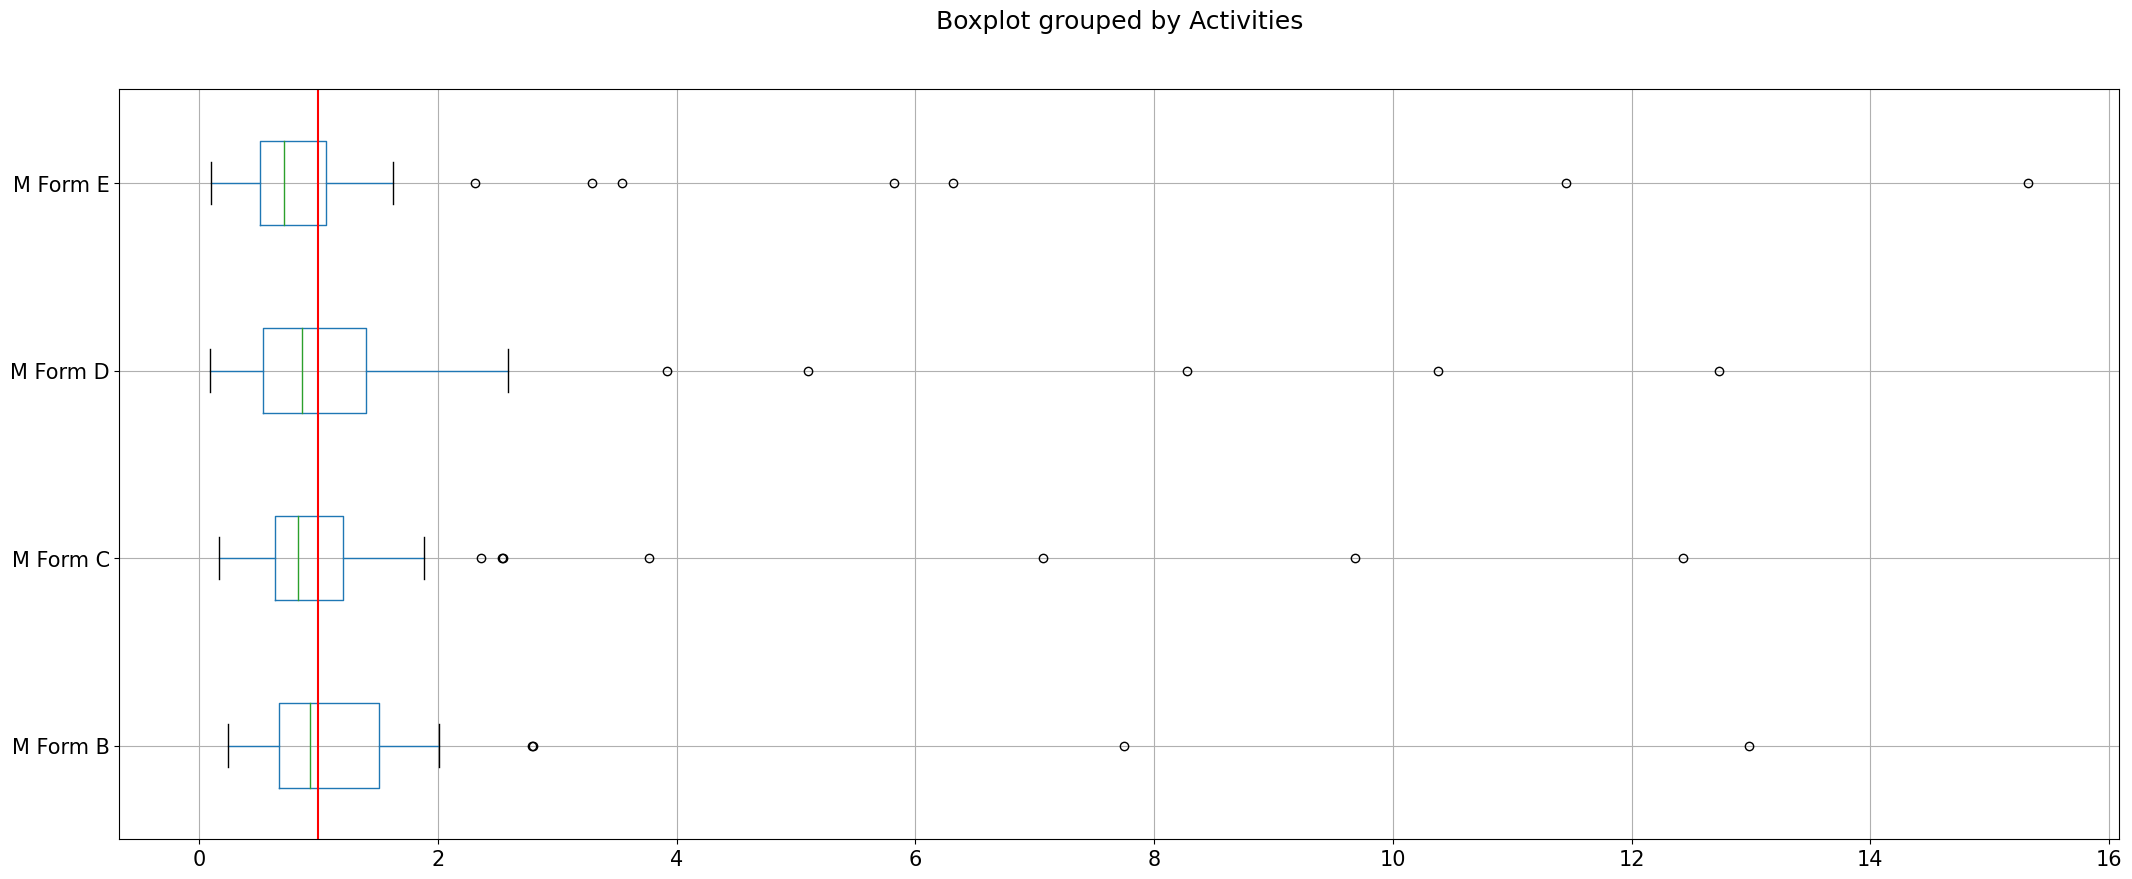

In [38]:
just_act_and_ct.boxplot(column = 'Corrected_Completion_Time', by = 'Activities', figsize=(25,10), vert=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.axvline(1, color = 'r')
plt.rcParams.update({'font.size': 15})
plt.show()

In [39]:
paused_subset['DateTime'] = pd.to_datetime(paused_subset['Date'] + ' ' + paused_subset['Time'])
total_completion_times = []
completion_times = []
paused_times = []

for assignment, group in paused_subset.groupby('Assignment'):
  begin_activity = group[group['Action'] == 'Begin activity Spring 2024 HS PSM Administration']['DateTime']
  end_activity = group[group['Action'] == 'End activity Spring 2024 HS PSM Administration']['DateTime']
  pause_activity = group[group['Action'] == 'Pause activity Spring 2024 HS PSM Administration']['DateTime']
  continue_activity = group[group['Action'] == 'Continue activity Spring 2024 HS PSM Administration']['DateTime']

  pause_time = 0

  if not begin_activity.empty and not end_activity.empty:
    start_time = begin_activity.iloc[0]
    end_time = end_activity.iloc[0]
    total_completion_time = end_time - start_time
    total_completion_times.append((assignment, total_completion_time))
    
  if not pause_activity.empty and not continue_activity.empty:
    pause_time = pause_activity.iloc[0]
    continue_time = continue_activity.iloc[0]
    paused_time = continue_time - pause_time
    paused_times.append((assignment, paused_time))
    total_completion_time = total_completion_time - paused_time

  completion_times.append((assignment, total_completion_time))

paused_times_df = pd.DataFrame(paused_times, columns=['Assignment', 'Paused Time'])
total_completion_times_df = pd.DataFrame(total_completion_times, columns=['Assignment','Completion Time'])
completion_times_df = pd.DataFrame(completion_times, columns = ['Assignment', 'Completion Time'])

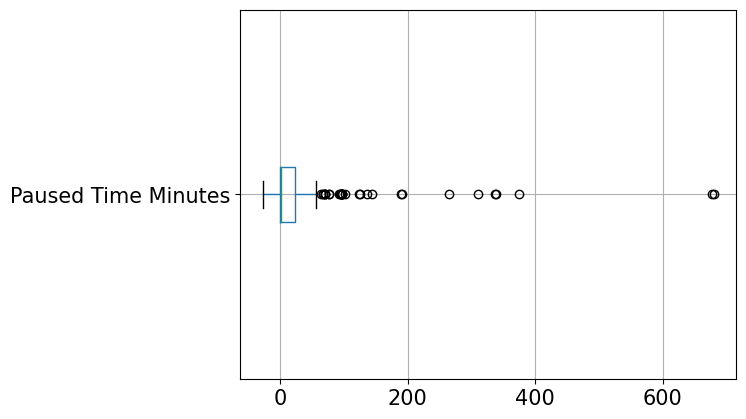

In [40]:
paused_times_df['Paused Time Minutes'] = [td.total_seconds()/3600 for td in paused_times_df['Paused Time']]
paused_times_df.boxplot('Paused Time Minutes', vert = False)
plt.show()

In [51]:
modified_day_limit = completion_times_df[completion_times_df['Completion Time'] <= pd.Timedelta(days=1)]
modified_day_limit

2417

# Merged DF with Completion Time

In [50]:
modified_CT_ddm_df = pd.merge(paused_subset[['Assignment','Activities']], modified_day_limit).drop_duplicates()
modified_CT_ddm_df_sorted = modified_CT_ddm_df.sort_values("Completion Time", ascending = True)
modified_CT_ddm_df_sorted

,Assignment,Activities,Completion Time
4561,105116,Spr 2024 PSM Form B,0 days 00:04:00.720000
1464,105828,Spr 2024 PSM Form C,0 days 00:04:26.961000
5065,112668,Spr 2024 PSM Form B,0 days 00:04:33.212000
5267,105393,Spr 2024 PSM Form E,0 days 00:04:35.275000
519,103729,Spr 2024 PSM Form E,0 days 00:04:35.694000
...,...,...,...
3914,108741,Spr 2024 PSM Form D,0 days 23:32:40.087000
1924,108217,Spr 2024 PSM Form D,0 days 23:35:22.517000
3471,103946,Spr 2024 PSM Form D,0 days 23:56:27.020000
68,104490,Spr 2024 PSM Form C,0 days 23:59:08.135000


In [44]:
modified_ave_per_act = modified_CT_ddm_df_sorted.groupby('Activities')[['Completion Time']].describe()
modified_ave_per_act = modified_ave_per_act.astype(str)
modified_ave_per_act[('Completion Time','mean')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','mean')]]
modified_ave_per_act[('Completion Time','std')] = [x[7:-10] for x in modified_ave_per_act[('Completion Time','std')]]
modified_ave_per_act[('Completion Time','min')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','min')]]
modified_ave_per_act[('Completion Time','25%')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','25%')]]
modified_ave_per_act[('Completion Time','50%')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','50%')]]
modified_ave_per_act[('Completion Time','75%')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','75%')]]
modified_ave_per_act[('Completion Time','max')] = [x[7:-7] for x in modified_ave_per_act[('Completion Time','max')]]

modified_ave_per_act

Completion Time                                   \
                              count         mean       std       min   
Activities                                                             
Spr 2024 PSM Form B             615  01:09:04.28  02:58:36  00:04:00   
Spr 2024 PSM Form C             612  00:59:06.10  02:41:01  00:04:26   
Spr 2024 PSM Form D             591  01:14:18.72  03:13:50  00:05:04   
Spr 2024 PSM Form E             599  01:03:51.57  02:46:49  00:04:35   

                                                             
                          25%       50%       75%       max  
Activities                                                   
Spr 2024 PSM Form B  00:18:29  00:29:22  00:42:34  22:58:42  
Spr 2024 PSM Form C  00:16:07  00:29:16  00:43:43  23:59:55  
Spr 2024 PSM Form D  00:18:46  00:31:15  00:46:19  23:56:27  
Spr 2024 PSM Form E  00:18:18  00:29:20  00:40:40  22:51:08

In [45]:
just_act_and_ct = modified_CT_ddm_df_sorted[['Assignment', 'Activities', 'Completion Time']].reset_index(drop=True)
just_act_and_ct['Completion Time'] = [td.total_seconds() / 3600 if isinstance(td, pd.Timedelta) else td for td in just_act_and_ct['Completion Time']]
just_act_and_ct['Activities'] = just_act_and_ct['Activities'].astype(str)
just_act_and_ct['Activities'] = [x[11:] for x in just_act_and_ct['Activities']]

just_act_and_ct

,Assignment,Activities,Completion Time
0,105116,M Form B,0.066867
1,105828,M Form C,0.074156
2,112668,M Form B,0.075892
3,105393,M Form E,0.076465
4,103729,M Form E,0.076582
...,...,...,...
2412,108741,M Form D,23.544469
2413,108217,M Form D,23.589588
2414,103946,M Form D,23.940839
2415,104490,M Form C,23.985593


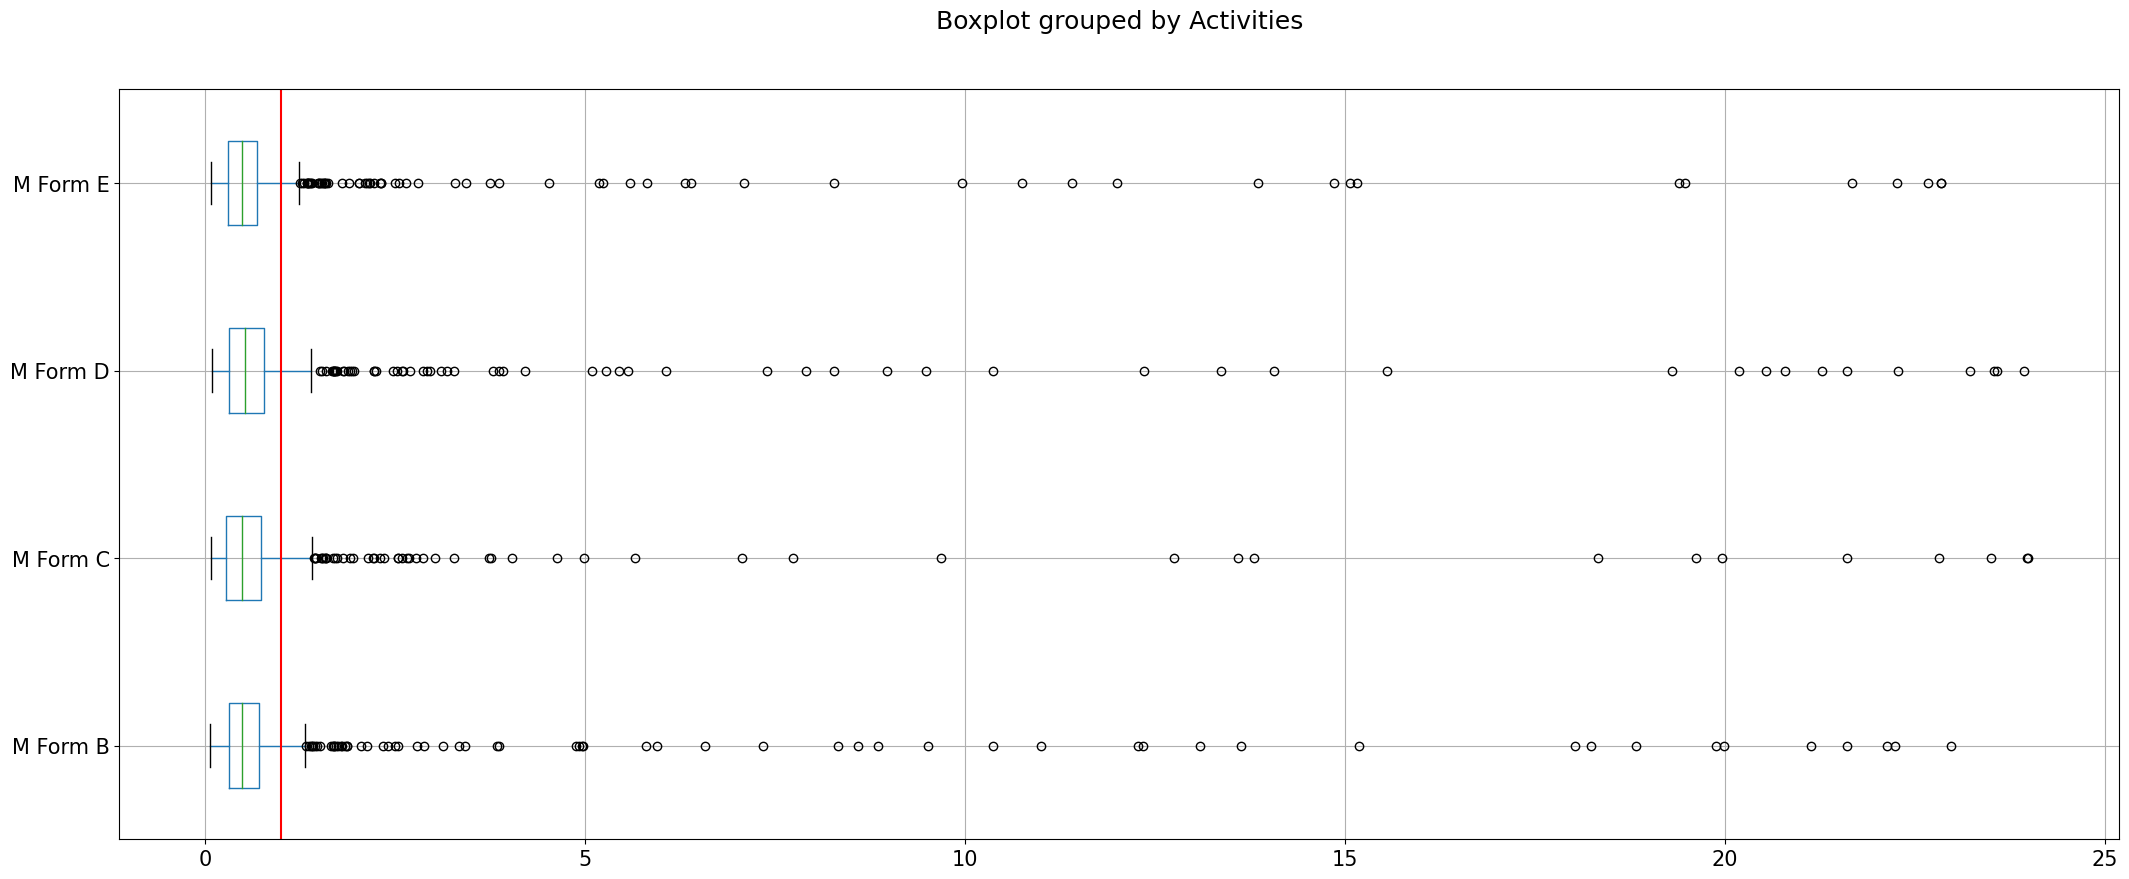

In [46]:
just_act_and_ct.boxplot(column = 'Completion Time', by = 'Activities', figsize=(25,10), vert=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.axvline(1, color = 'r')
plt.rcParams.update({'font.size': 15})
plt.show()